In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(16.7,8.27)})

In [522]:
# This is the normal state
df = pd.read_csv("7hnz0037.csv")
df.head()

,time [s],line [1],track/ direction [1],loc. (actual) [km],loc. (target) [km],way (actual) [km],way (target) [km],speed (actual) [km/h],speed (target) [km/h],voltage [V],...,energy braking resistor [kWh],state [1],tractive effort (actual) [kN],tractive effort (target) [kN],line and running resistance [kN],acceleration (actual) [m/(s*s)],acceleration (target) [m/(s*s)],desired speed [km/h],train configuration [1],utilization rate [%]
0,3934,2,2,9.340000,9.34,0.000000,0.0,0.2,0.2,785.202087,...,0.0,15,0.000000,0,0.000000,0.000000,0,0.0,2,100
1,3936,2,2,9.339889,9.34,0.000111,0.0,0.2,0.2,785.416748,...,0.0,30,1.167702,0,1.167702,0.000000,0,0.2,2,100
2,3938,2,2,9.339778,9.34,0.000222,0.0,0.2,0.2,784.113892,...,0.0,30,1.167702,0,1.167702,0.000000,0,0.2,2,100
3,3940,2,2,9.338555,9.34,0.001444,0.0,4.2,4.2,778.748291,...,0.0,20,33.361591,0,1.167702,0.555556,0,4.2,2,100
4,3942,2,2,9.334444,9.34,0.005556,0.0,10.6,10.6,773.262268,...,0.0,20,52.718021,0,1.207798,0.888889,0,10.6,2,100


To keep it simple we will use only the __(way(actual) [km]), (voltage [V])__ columns.

In [526]:
df = df[['loc. (actual) [km]', 'voltage [V]']]
df = df.set_index("loc. (actual) [km]")
df.sort_index(inplace=True)

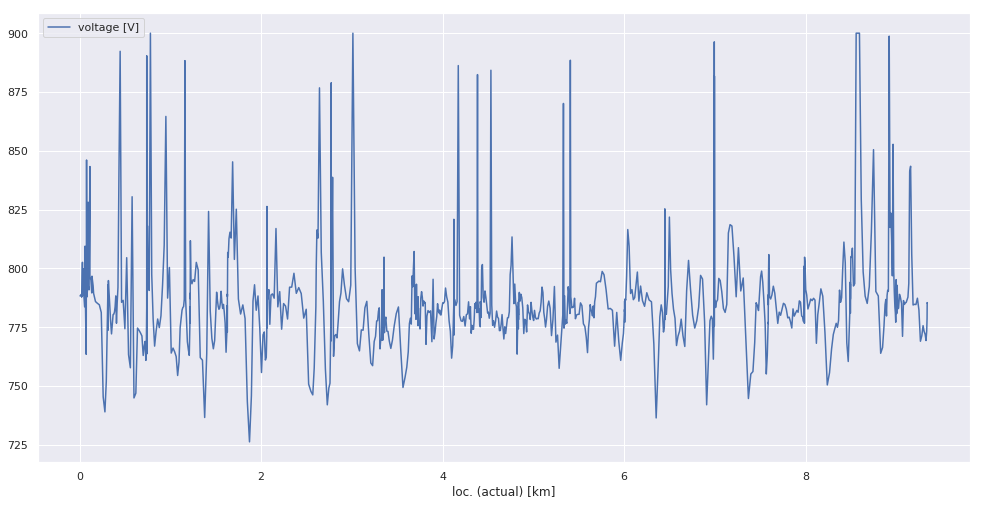

In [527]:
df.plot()

In [528]:
df.describe()

,voltage [V]
count,1002.000000
mean,785.557665
std,20.320245
min,726.185547
25%,777.730652
50%,783.249573
75%,788.359253
max,899.999939


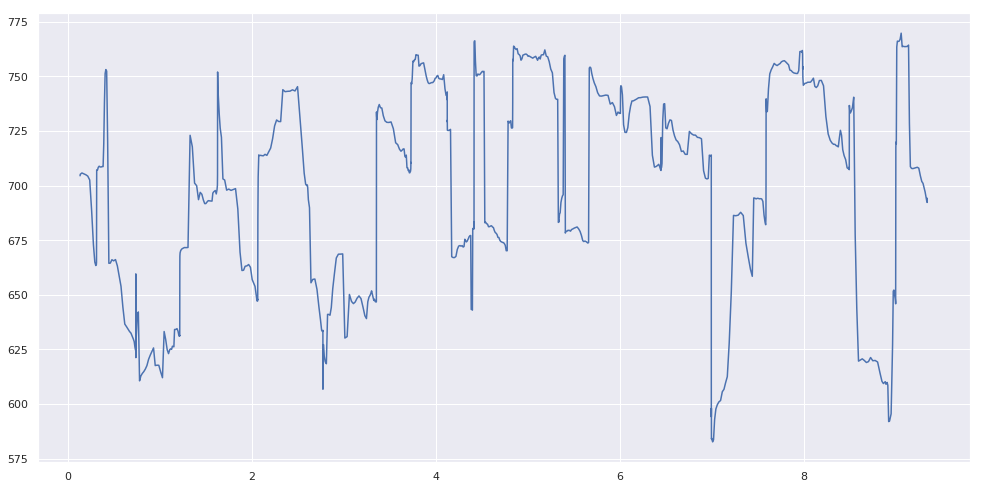

In [529]:
# suppose that we set our threshold at mean - 2*std
window = 25
rolling_thres = df.rolling(window=window).mean() - 5*df.rolling(window=window).std()
plt.plot(rolling_thres)
const_thres = df.mean() - 2*df.std()

In [530]:
# This is error state for base station 1
df_1 = pd.read_csv("7hnz0037E1.csv")
df_1.head()


,time [s],line [1],track/ direction [1],loc. (actual) [km],loc. (target) [km],way (actual) [km],way (target) [km],speed (actual) [km/h],speed (target) [km/h],voltage [V],...,energy braking resistor [kWh],state [1],tractive effort (actual) [kN],tractive effort (target) [kN],line and running resistance [kN],acceleration (actual) [m/(s*s)],acceleration (target) [m/(s*s)],desired speed [km/h],train configuration [1],utilization rate [%]
0,3934,2,2,9.340000,9.34,0.000000,0.0,0.2,0.2,784.849365,...,0.0,15,0.000000,0,0.000000,0.000000,0,0.0,2,100
1,3936,2,2,9.339889,9.34,0.000111,0.0,0.2,0.2,784.855957,...,0.0,30,1.167702,0,1.167702,0.000000,0,0.2,2,100
2,3938,2,2,9.339778,9.34,0.000222,0.0,0.2,0.2,783.413330,...,0.0,30,1.167702,0,1.167702,0.000000,0,0.2,2,100
3,3940,2,2,9.338555,9.34,0.001444,0.0,4.2,4.2,778.076843,...,0.0,20,33.361591,0,1.167702,0.555556,0,4.2,2,100
4,3942,2,2,9.334444,9.34,0.005556,0.0,10.6,10.6,772.624817,...,0.0,20,52.718021,0,1.207798,0.888889,0,10.6,2,100


In [531]:
df_1 = df_1[['loc. (actual) [km]', 'voltage [V]']]
df_1.head()
df_1 = df_1.set_index(df.index)
df_1.sort_index(inplace=True)

In [532]:
df_1.head()

,loc. (actual) [km],voltage [V]
loc. (actual) [km],,
0.005148,9.340000,784.849365
0.018203,9.339889,784.855957
0.022167,9.339778,783.413330
0.022278,9.338555,778.076843
0.023361,9.334444,772.624817


In [533]:
df_1.describe()

,loc. (actual) [km],voltage [V]
count,1002.000000,1002.000000
mean,4.683092,780.972220
std,2.673736,22.238392
min,0.005153,721.435303
25%,2.609625,770.795929
50%,4.631051,779.917084
75%,6.993509,786.858704
max,9.340000,899.999939


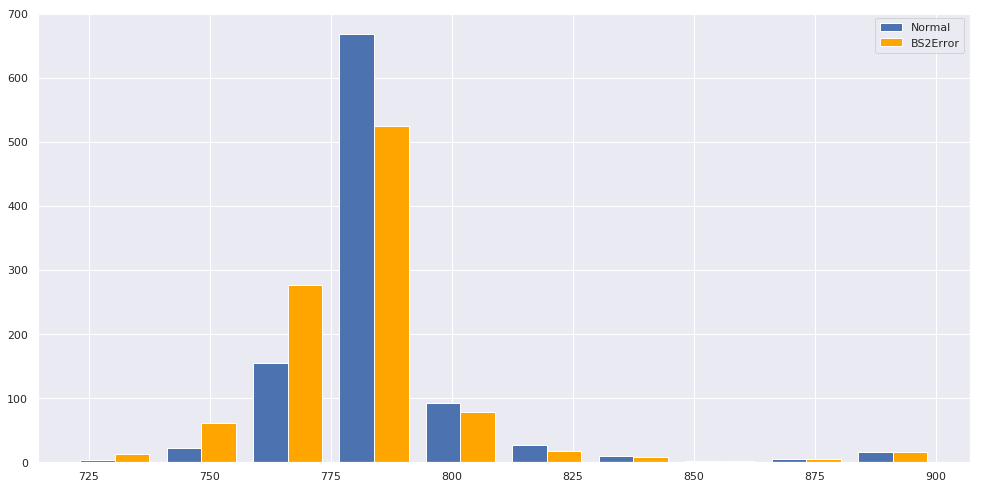

In [534]:
plt.hist([df['voltage [V]'],df_1['voltage [V]']], color = ['b','orange'],label=['Normal','BS2Error'])
plt.legend()

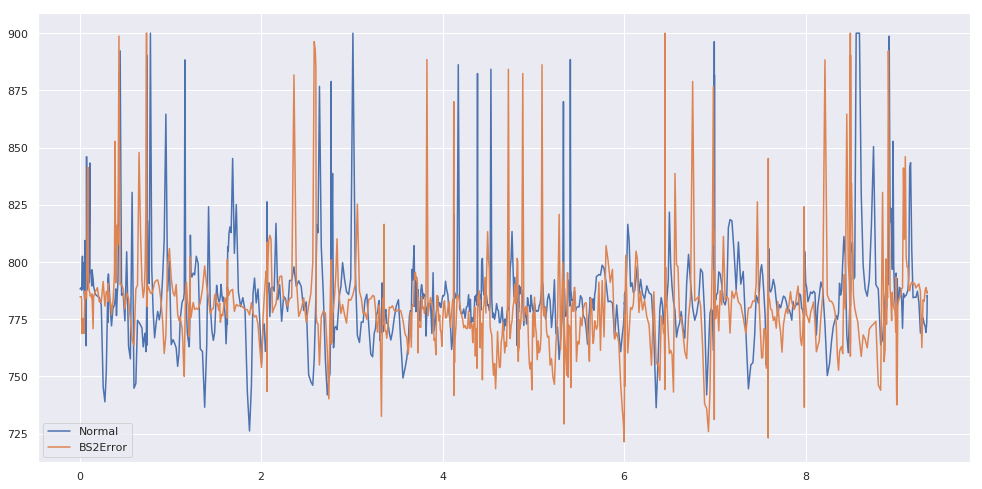

In [535]:
plt.plot(df,label='Normal')
plt.plot(df_1['voltage [V]'], label='BS2Error')
plt.legend(loc='best')

plt.show()

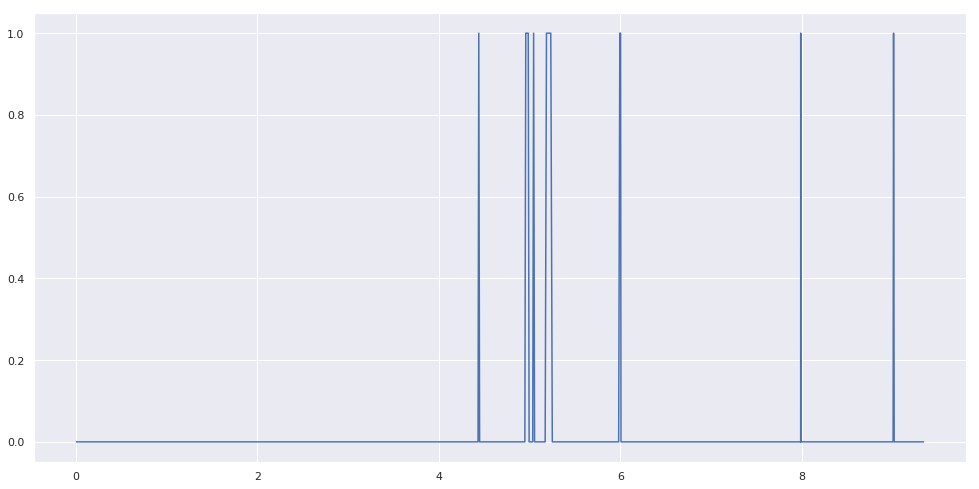

In [536]:
# problem is distance measurements are a bot different
errors_roll_thresh = df_1['voltage [V]'] < rolling_thres['voltage [V]']
plt.plot(errors_roll_thresh)


In [537]:
df_1 = df_1[['voltage [V]']]

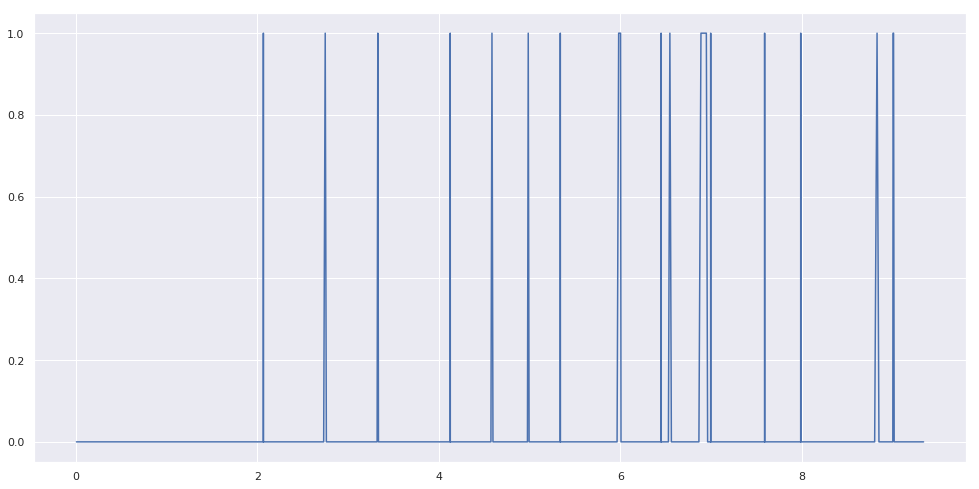

In [538]:
errors_const_thresh = df_1 < const_thres
plt.plot(errors_const_thresh)